IMPORTING ALL NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

LOADING STUDENT DATA 

In [2]:
df=pd.read_csv("../DATA/StudentsPerformance.csv")


DATASET OVERVIEW

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


FOR DATA CLEANING--------->

In [9]:
df.columns=(df.columns
            .str.strip()
            .str.lower()
            .str.replace(" ","_")
            .str.replace("/","_")
           )

In [10]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Feature engineering: adding new feature total_score by adding score of Math , Reading , Writting ------------->

In [12]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]

In [13]:
df[["math_score","writing_score","reading_score"]].describe()

,math_score,writing_score,reading_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


UNIVARIATE ANALYSIS

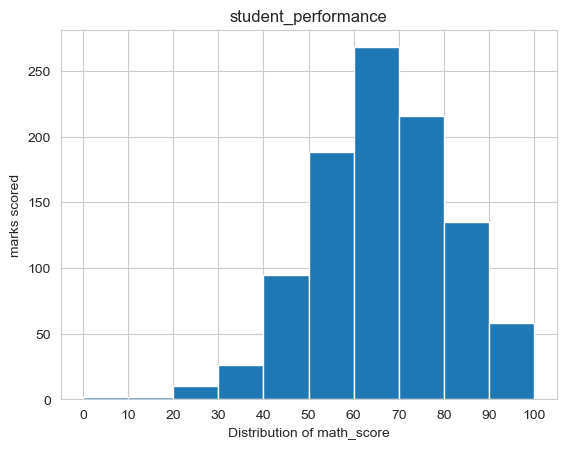

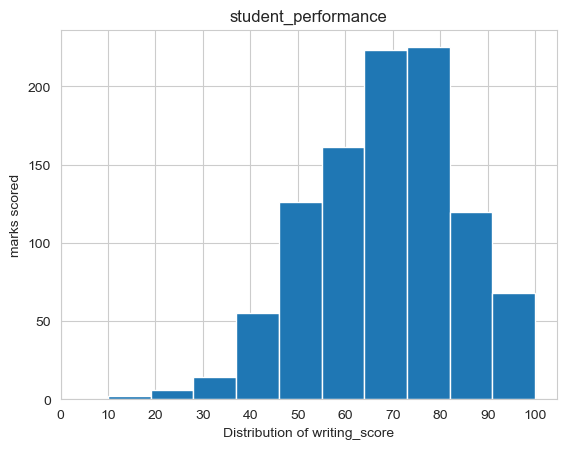

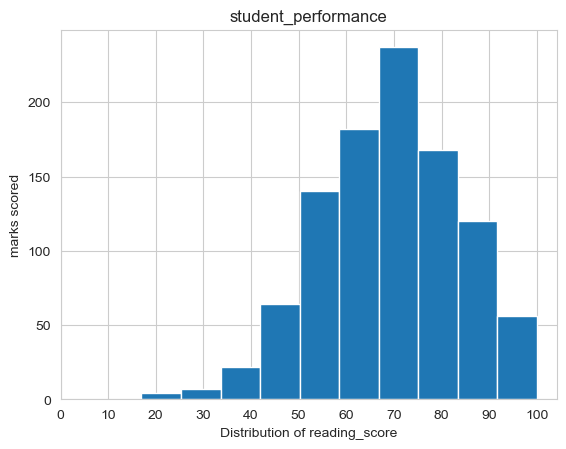

In [14]:
cols =["math_score","writing_score","reading_score"]
for col in cols:
    plt.figure()
    plt.hist(df[col],bins=10)
    plt.xlabel(f"Distribution of {col}")
    plt.ylabel("marks scored")
    plt.title("student_performance")
    plt.xticks(range(0,101,10))
    plt.show()

BIVARIATE ANALYSIS

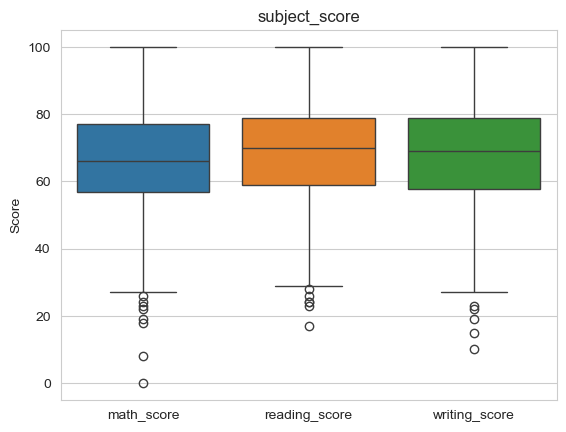

In [21]:
sns.boxplot(data=df[["math_score","reading_score","writing_score"]])
plt.ylabel("Score")
plt.title("subject_score")
plt.show()

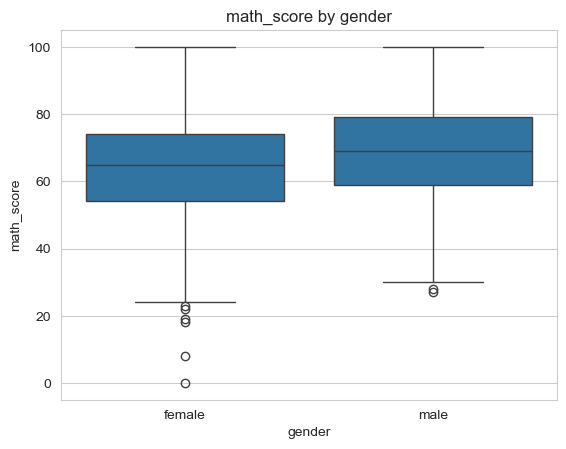

In [16]:
sns.boxplot(x="gender" ,  y="math_score", data=df)
plt.title("math_score by gender")
plt.show()

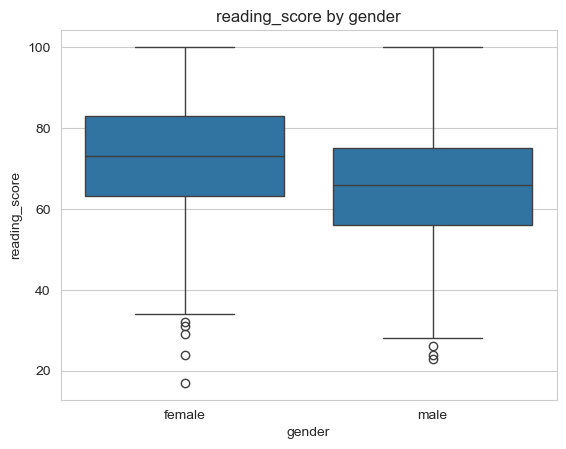

In [17]:
sns.boxplot(x="gender" ,  y="reading_score", data=df)
plt.title("reading_score by gender")
plt.show()

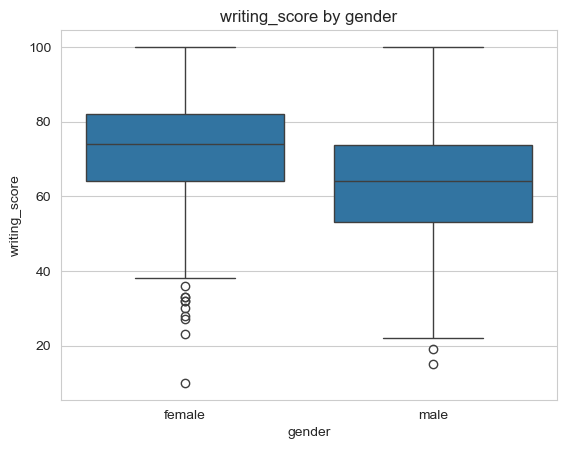

In [18]:
sns.boxplot(x="gender" ,  y="writing_score", data=df)
plt.title("writing_score by gender")
plt.show()

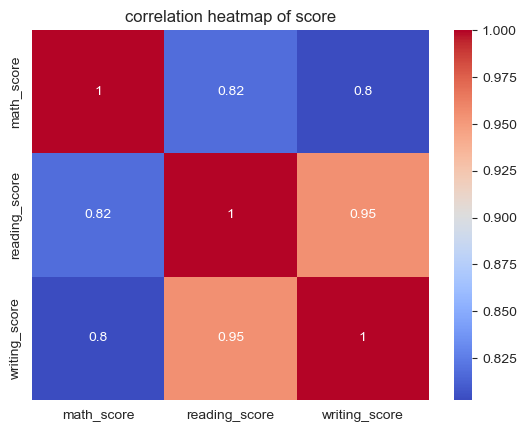

In [19]:
corr=df[["math_score","reading_score","writing_score"]].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("correlation heatmap of score")
plt.show()

Text(0, 0.5, 'marks')

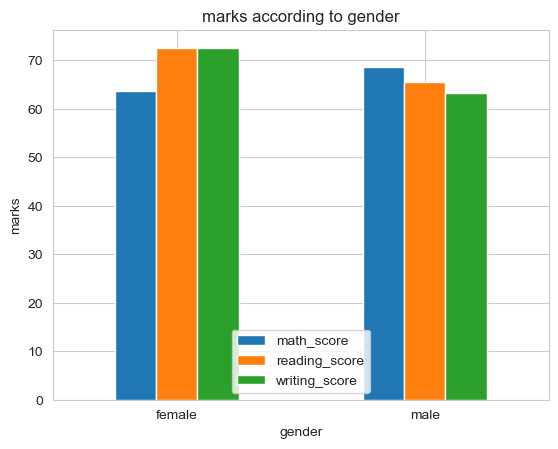

In [20]:
group_means=df.groupby("gender")[["math_score","reading_score","writing_score"]].mean()
group_means.plot(kind="bar")
plt.title("marks according to gender")
plt.xticks(rotation=0)#this rotate the x label i.e male and female 
plt.ylabel("marks")


CONCLUSION

Most students score between 50 and 80 in all subjects.

Reading and writing scores are strongly correlated.

There are a few low-score outliers in the dataset.

Gender shows a small difference in average reading and writing scores.

Reading_score and Writing_score are very highly correlated to each other